#### Logistic Regression

Classification method that models the probability of a data item belonging to one two categories. We wish to create a boundary line.

In this example: we wish to model whether a student gets a job based on their average mark in data structures and ML.

For now: Assume that we have a data in only one dimension (say, average marks) and there are two class labels referring to those who got a job and those who didn't. We will call them as positive and negative classes in this discussion. We can try to find a linear regression line that gives us a probability, however target values are either 0 or 1, so this is hard to capture through a linear relationship. We prefer to find a sigmoid/logistic curve that tries to capture the pattern in which most of the predicted values will lie on either y=0 or y=1.

##### Learning the Parameters
We begin with random inital values of the parameters, and by observing the error, we update them to slightly reduce the error. Gradient descent. We try to use the gradient of the cost function to move to the minimum possible cost.

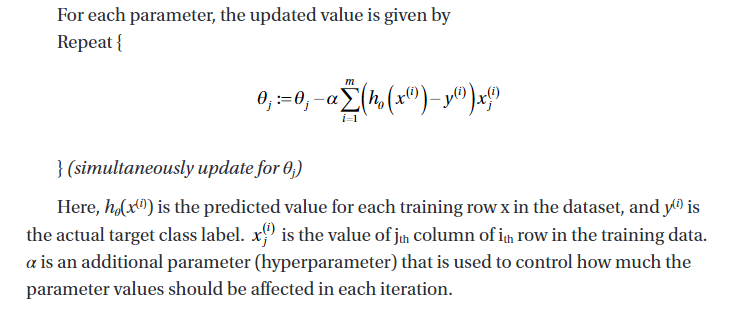

We give an example revisiting the iris dataset:

In [32]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
iris = datasets.load_iris() #returns a dictionary containing column titles

#prepare the full dataframe

iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_data['target'] = iris['target']
iris_data['target'] = iris_data['target'].apply( lambda x:iris['target_names'][x])

iris_data['target']
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
#We will only pick data from Iris Setosa and Iris Versicolor categories to simplify the dataset to be able to fit a binary classification

df = iris_data.query("target=='setosa' | target == 'versicolor'")
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


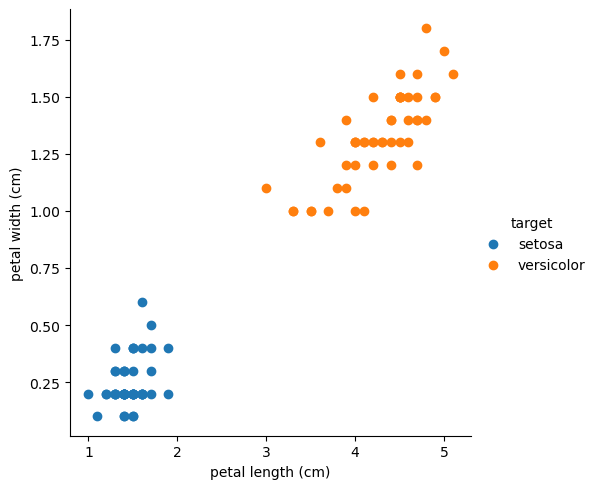

In [25]:
import seaborn as sns
sns.FacetGrid(df, hue='target', height = 5).map(plt.scatter, 'petal length (cm)', 'petal width (cm)').add_legend()

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
X = iris_data.drop(columns=['target'])
y = iris_data['target']
logistic_regression.fit(X,y)


c:\Users\adam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
X_test = [[5.6, 2.4, 3.8, 1.2]]
logistic_regression.predict(X_test)

c:\Users\adam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

(3.3, 7.980000000000004)

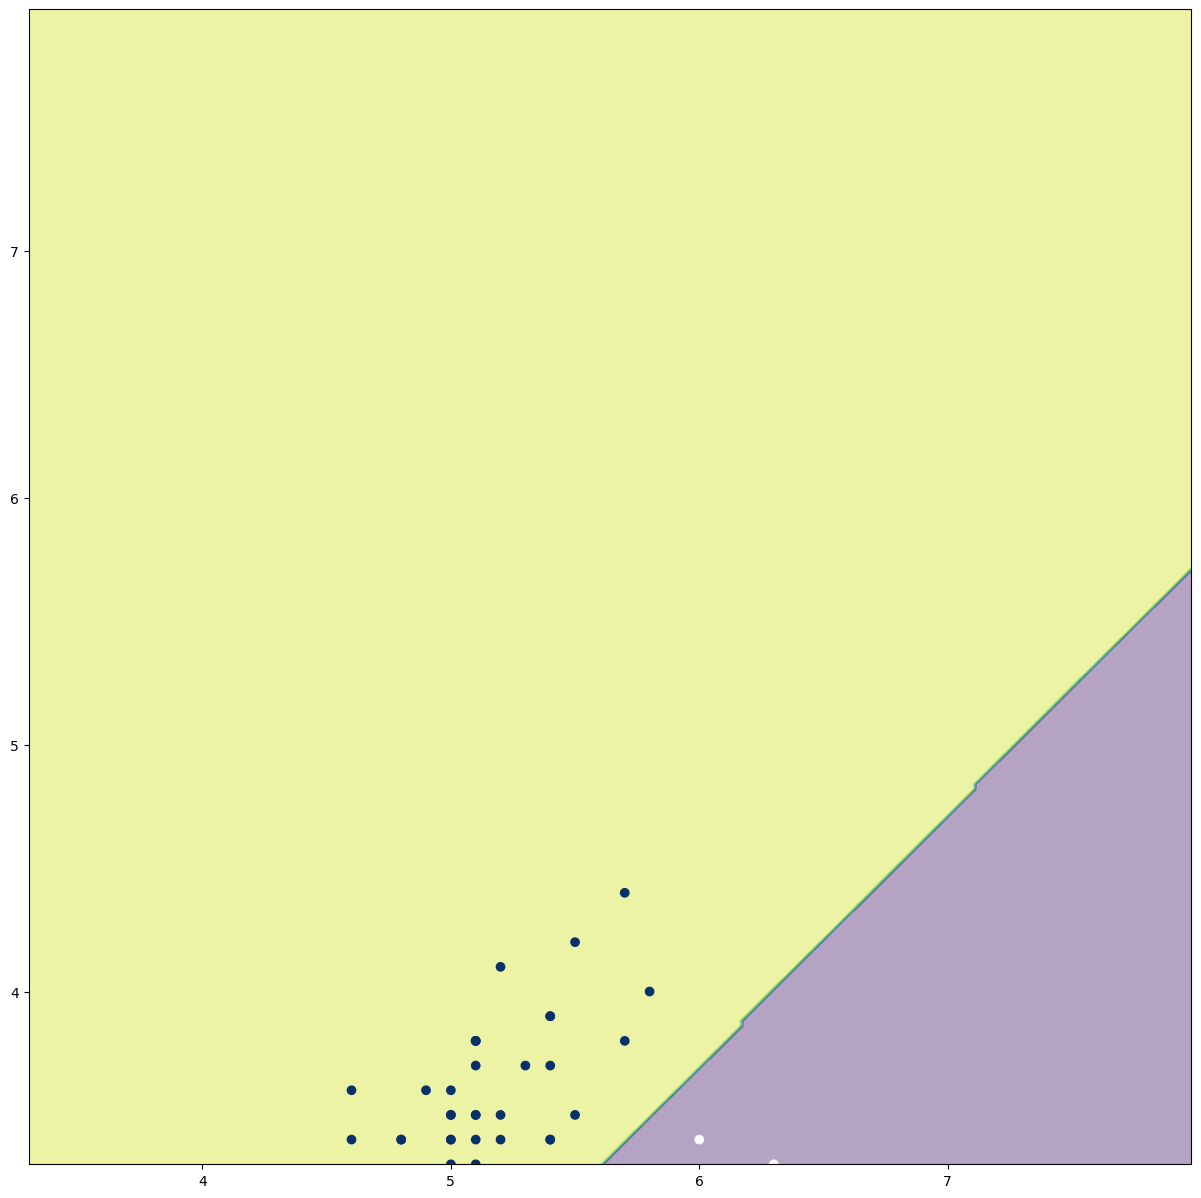

In [39]:
#To understand how the learned model splits the data into two classes, we will recreate the modul using only two dimensions and plot a 2D chart based on sepal length and sepal width
df = iris_data.query("target == 'setosa' | target == 'versicolor'")[['sepal length (cm)', 'sepal width (cm)', 'target']]

X = df.drop(columns=['target']).values
y = df['target'].values
y = [1 if x =='setosa' else 0 for x in y]
logistic_regression.fit(X,y)

#Once we have learned the parameters, take all points in 2D space, predict the probable class of every such point, and based on these predictions, colour the point

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,0].min()-1, X[:,0].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# plt.rcParams['figure.figsize'] = (15,15)
plt.figure()
plt.contourf(xx,yy, Z, alpha=0.4)

plt.scatter(X[:,0], X[:,1], c=y, cmap='Blues')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())